In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('data/inventario.csv')
df.head()

,listing_id,artist,title,label,catno,format,release_id,status,price,listed,comments,media_condition,sleeve_condition,accept_offer,external_id,weight,format_quantity,location
0,1161793621,King Tutt,Comin' Out / Even Though,T.K. Disco,458,"12""",694699,Sold,6.00,2021-03-17 06:25:42,Original T.K. Disco Sleeve,Near Mint (NM or M-),Generic,Y,NaN,230,1,039
1,1364731297,King Crimson,In The Court Of The Crimson King,"Polydor, EG",800 030-2,"CD, Album, RE",2981367,Sold,17.00,2021-03-17 07:05:50,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda12
2,1287142647,David S. Ware String Ensemble,Threads,Thirsty Ear,THI57137.2,"CD, Album",1099653,Sold,11.00,2021-03-17 07:08:13,SEALED (Precintado),Mint (M),Mint (M),Y,NaN,85,1,HCajón01
3,1287144780,David Eyges,The Captain,MidLantic Records,MR2002-103,"CD, Album, RE",10108236,Sold,9.99,2021-03-17 07:08:14,Almost like new. Private Collection. Close to ...,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HCajón01
4,1362016279,"Dmitri Shostakovich, Государственный Симфониче...","Symphony No 5 In D Minor Op 47, Symphony No 9 ...",Olympia (2),OCD 113,CD,10422040,Sold,9.99,2021-03-17 07:08:14,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda20


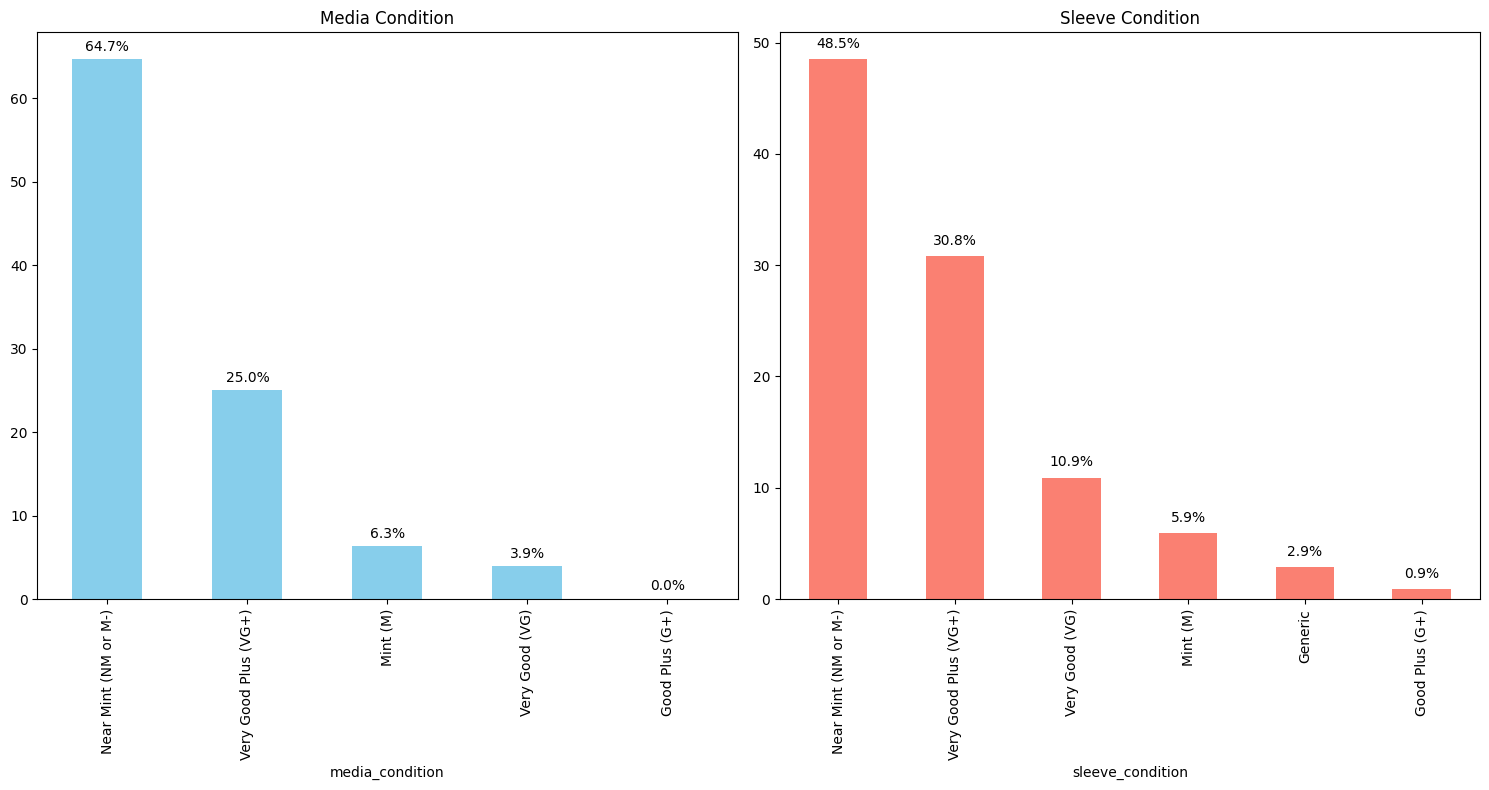

In [26]:
import matplotlib.pyplot as plt

# Calcular los porcentajes de valores únicos en cada columna
media_percentages = df['media_condition'].value_counts(normalize=True) * 100
sleeve_percentages = df['sleeve_condition'].value_counts(normalize=True) * 100
sleeve_percentages = sleeve_percentages[:6]

# Crear la figura y los ejes para los gráficos de barras paralelos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Graficar el primer gráfico de barras (media_condition) con porcentajes
media_percentages.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Media Condition')

# Añadir etiquetas de porcentaje en las barras
for i, v in enumerate(media_percentages):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center')

# Graficar el segundo gráfico de barras (sleeve_condition) con porcentajes
sleeve_percentages.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Sleeve Condition')

# Añadir etiquetas de porcentaje en las barras
for i, v in enumerate(sleeve_percentages):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [22]:
sleeve_percentages[:6]

sleeve_condition
Near Mint (NM or M-)    48.497249
Very Good Plus (VG+)    30.833391
Very Good (VG)          10.914536
Mint (M)                 5.925681
Generic                  2.887093
Good Plus (G+)           0.888069
Name: proportion, dtype: float64